In [1]:
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

## The Science of Sound

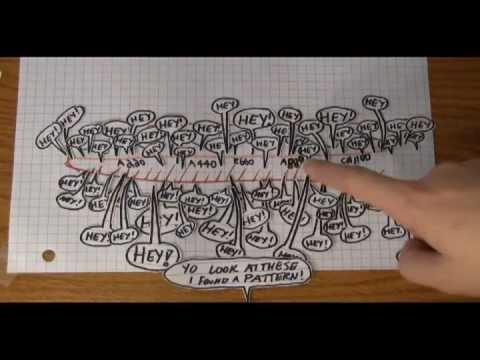

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('i_0DXxNeaQ0')

# Jupyter Audio Basics

## Audio Libraries

We will mainly use two libraries for audio acquisition and playback: 

### 1. librosa

[`librosa`](https://librosa.github.io/librosa/index.html) is a Python package for music and audio processing by [Brian McFee](https://bmcfee.github.io/). A large portion was ported from [Dan Ellis's Matlab audio processing examples](http://www.ee.columbia.edu/%7Edpwe/resources/matlab/).

#### Installing librosa

You can install `librosa` by executing the following cell.

In [ ]:
!pip install librosa

### 2. IPython.display.Audio

[`IPython.display.Audio`](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) lets you play audio directly in an IPython notebook.

## Included Audio Data

This GitHub repository includes many short audio excerpts for your convenience.

Here are the files currently in the `audio` directory:

In [3]:
ls audio

125_bounce.wav                  latin_groove.mp3
58bpm.wav                       oboe_c6.wav
README.md                       prelude_cmaj.wav
brahms_hungarian_dance_5.mp3    simple_loop.wav
busta_rhymes_hits_for_days.mp3  simple_piano.wav
c_strum.wav                     sir_duke_piano_fast.mp3
clarinet_c6.wav                 sir_duke_piano_slow.mp3
classic_rock_beat.mp3           sir_duke_trumpet_fast.mp3
classic_rock_beat.wav           sir_duke_trumpet_slow.mp3
conga_groove.wav                thx_original.mp3
drum_samples/                   tone_440.wav
funk_groove.mp3                 yanni-laurel.wav
jangle_pop.mp3


Visit https://ccrma.stanford.edu/workshops/mir2014/audio/ for more audio files.

## More on audio sampling

* *Real* audio is
    * a wave
    * changes in air pressure
    * continuous
* Digital audio is
    * Sampled in discrete time units
    * Discrete

## Audio Sampling

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Signal_Sampling.png/640px-Signal_Sampling.png"/>

## Reading Audio

Use [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [5]:
import librosa
x, sr = librosa.load('audio/simple_loop.wav')

If you receive an error with `librosa.load`, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).

#### The output of `load`

* `x` is a `numpy` array of digitized music
* `sr` is the sampling rate

## Audio Sampling

* `sr` is $T$
* `x` is the height at each sample point

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Signal_Sampling.png/640px-Signal_Sampling.png" width="210"/>

## The sampling rate

* Give the sampling time unit

## Audio Data `type`

`librosa` stores audio in a `numpy` array.  `numpy` is/has 

* a popular module
* efficient numeric arrays
* fast numeric computations

In [10]:
type(x)

numpy.ndarray

#### `shape` give the array dimensions

In [20]:
x.shape # Audio is 1D

(49613,)

#### `dtype` shows the content type

In [19]:
x.dtype

dtype('float32')

#### Slicing works on `numpy` arrays

In [21]:
x[10:]

array([ 0.0000000e+00,  0.0000000e+00,  3.0517578e-05, ...,
       -9.8571777e-03, -1.1047363e-02, -7.5378418e-03], dtype=float32)

## Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

Plot the audio array using [`librosa.display.waveplot`](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot):

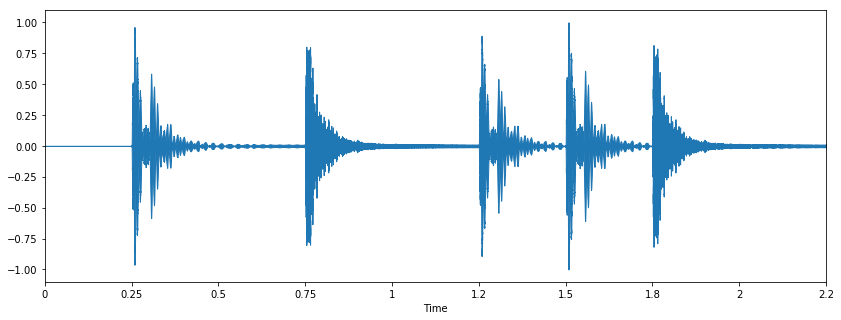

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Display a spectrogram using [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

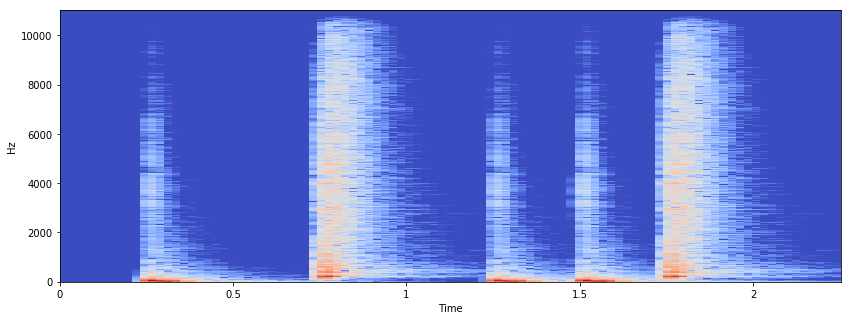

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

## Playing Audio

### `IPython.display.Audio`

Using [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [14]:
import IPython.display as ipd
ipd.Audio('audio/conga_groove.wav') # load a local WAV file

`Audio` can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz:

In [15]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

Listen to the audio array:

In [16]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Writing Audio

[`librosa.output.write_wav`](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html#librosa.output.write_wav) saves a NumPy array to a WAV file.

In [11]:
librosa.output.write_wav('audio/tone_440.wav', x, sr)

## <font color="red"> Exercise 1 - Yanny or Laurel</font>

Last summer, there was a viral audio click, in which some people hear "Yanny" and others hear "Laurel".  The audio is available in the file `./audio/yanni-laurel.wav`.  Perform the following task.

#### Load and play the audio

#### Which word do you hear?

#### Make the waveplot of the audio

#### Make the spectrogram of the audio

[&larr; Back to Index](index.html)